https://stepik.org/lesson/1370116/step/1

https://github.com/selfedu-rus/machine_learning/blob/main/machine_learning_33.py

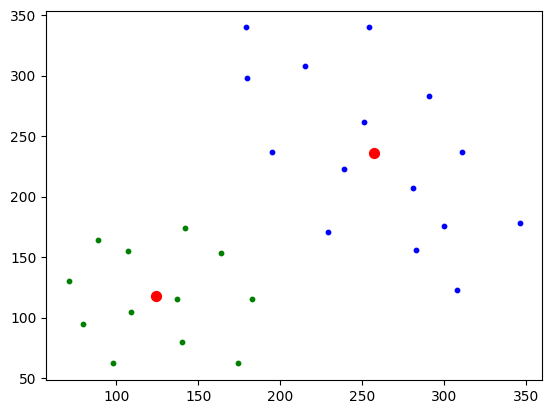

In [ ]:
# Алгоритм Ллойда (метод K-средних для кластеризации)

import numpy as np
import matplotlib.pyplot as plt

x = [(98, 62), (80, 95), (71, 130), (89, 164), (137, 115), (107, 155), (109, 105), (174, 62), (183, 115), (164, 153),
     (142, 174), (140, 80), (308, 123), (229, 171), (195, 237), (180, 298), (179, 340), (251, 262), (300, 176),
     (346, 178), (311, 237), (291, 283), (254, 340), (215, 308), (239, 223), (281, 207), (283, 156)]

# x = [(64, 150), (84, 112), (106, 90), (154, 64), (192, 62), (220, 82), (244, 92), (271, 111), (275, 137), (286, 161), (56, 178), (80, 156), (101, 131), (123, 104), (155, 94), (191, 100), (242, 70), (231, 114), (272, 95), (261, 131), (299, 136), (308, 124), (128, 78), (47, 128), (47, 159), (137, 186), (166, 228), (171, 250), (194, 272), (221, 287), (253, 292), (308, 293), (332, 280), (385, 256), (398, 237), (413, 205), (435, 166), (447, 137), (422, 126), (400, 154), (389, 183), (374, 214), (358, 235), (321, 250), (274, 263), (249, 263), (208, 230), (192, 204), (182, 174), (147, 205), (136, 246), (147, 255), (182, 282), (204, 298), (252, 316), (312, 321), (349, 313), (393, 288), (417, 259), (434, 222), (443, 187), (463, 174)]
# x = [(126, 63), (101, 100), (80, 160), (88, 208), (89, 282), (88, 362), (94, 406), (149, 377), (147, 304), (147, 235), (146, 152), (160, 103), (174, 142), (169, 184), (170, 241), (169, 293), (185, 376), (178, 422), (116, 353), (124, 194), (273, 69), (277, 112), (260, 150), (265, 185), (270, 235), (265, 295), (281, 351), (285, 416), (321, 404), (316, 366), (306, 304), (309, 254), (309, 207), (327, 161), (318, 108), (306, 66), (425, 66), (418, 135), (411, 183), (413, 243), (414, 285), (407, 333), (411, 385), (443, 387), (455, 330), (441, 252), (457, 207), (453, 149), (455, 90), (455, 56), (439, 102), (431, 162), (431, 193), (426, 236), (427, 281), (438, 323), (419, 379), (425, 389), (422, 349), (451, 275), (441, 222), (297, 145), (284, 195), (288, 237), (292, 282), (288, 313), (303, 356), (293, 395), (274, 268), (280, 344), (303, 187), (114, 247), (131, 270), (144, 215), (124, 219), (98, 240), (96, 281), (146, 267), (136, 221), (123, 166), (101, 185), (152, 184), (104, 283), (74, 239), (107, 287), (118, 335), (89, 336), (91, 315), (151, 340), (131, 373), (108, 133), (134, 130), (94, 260), (113, 193)]

M = np.mean(x, axis=0)      # вычисление средних по каждой координате
D = np.var(x, axis=0)       # вычисление дисперсий по каждой координате
K = 2                       # число кластеров
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]        # начальные центры кластеров
ro = lambda x_vect, m_vect: np.mean((x_vect - m_vect) ** 2)             # евклидова метрика

n = 0
while n < 10:
    X = [[] for i in range(K)]                  # инициализация пустого двумерного списка для хранения объектов кластеров

    for x_vect in x:
        r = [ro(x_vect, m) for m in ma]         # вычисление расстояний для текущего образа до центров кластеров
        X[np.argmin(r)].append(x_vect)          # добавление образа к кластеру с ближайшим центром

    ma = [np.mean(xx, axis=0) for xx in X]      # пересчет центров кластеров

    n += 1


# отображение найденных кластеров
COLORS = ('green', 'blue', 'brown', 'black')     # цветов должно быть не меньше кластеров (>= K)
for i in range(K):
    xx = np.array(X[i]).T
    plt.scatter(xx[0], xx[1], s=10, color=COLORS[i])

# отображение центров кластеров
mx = [m[0] for m in ma]
my = [m[1] for m in ma]
plt.scatter(mx, my, s=50, color='red')

plt.show()